# Business Intelligence Data Challenge

## Data Set Insights

#### table_A_conversions.csv:

 - example list of conversions/ sales/ transaction
 - Conv_ID - transaction ID
 - Conv_Date - transaction date
 - Revenue - value of transaction
 - User_ID - an ID of a customer

#### table_B_attribution.csv:

 - list of attribution results for conversions
 - Conv_ID - transaction ID (link to table A)
 - Channel - marketing channel
 - IHC_Conv - attributed conversion fraction by the IHC model

#### Note, that the attributed conversion fraction (IHC_Conv), i.e. it is the fraction of the given conversion which is attributed to a certain channel, sums up to 1.0 for every conversion.

## Notebook Structure.

#### 1. Importing Dataset
#### 2. Insights about the Datasets.
	- Insights
	- let's look for the completeness of the both datasets.
#### 3. Data Wrangling.
	- Lets's Combine the both dataset for getting the information of the Channels and IHC_Conv, and insights about the dataset, after combining.
	- Changing the Columns Data Types.
	- Facts from the Conversions Dataset.
	- Facts from the the Dataset after mergin both.
	- Comparison.
#### 4. RFM Segmentation
	- RfmSegmentation according to the Conversions.
	- Interpretation.
	- Quartile Method.
	- Evaluation of the Quartile Method.
	- checking the conversion of the top User, according to the RFM and Quartile Method.
#### 5. Cohort Analysis
	- Calculating Cohort.
	- Interpretation.
	- Results.
	- Plotting the Cohort Analysis Output.


In [1]:
# Importing all important packages.

In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import datetime as dt                            # for creating datetime variable
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

%matplotlib inline

# 1) Importing the dataset.

In [2]:
# importing teh Conversions dataset.
df_conversions = pd.read_csv('dataset/table_A_conversions.csv')

# importing the attributions dataset.
df_attributions = pd.read_csv('dataset/table_B_attribution.csv')

# 2) Insights About Datasets.

### i) Insights

In [3]:
# checking the shape of conversion dataset. 
print('Shape of First: ', df_conversions.shape)

# checking the shape of attribution dataset.
print('Shape of Second: ', df_attributions.shape)

Shape of First:  (79643, 4)
Shape of Second:  (211060, 3)


In [4]:
# checking the top 5 rows of converstion dataframe .

df_conversions.head(5)

,Conv_Date,Revenue,User_ID,Conv_ID
0,2017-03-06,47.00000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c
1,2017-03-02,98.00004,NaN,faf5c1181ea84a32237dff45ca201d2c28f19d7b
2,2017-03-02,180.35300,NaN,b0e58a88459ece1b585ca22c93e633dc56273b83
3,2017-03-23,201.94104,433fdf385e33176cf9b0d67ecf383aa928fa261c,f0e6b7de22332c7b18c024e550bb1d860130cdf1
4,2017-03-03,197.47008,NaN,966568c7c859480c79b212520d20a51e735fd735


In [5]:
# checking the top 5 rows of attribution dataframe.

df_attributions.head(5)

,Channel,IHC_Conv,Conv_ID
0,H,1.000000,881152bb20f9b73daafb99d77714f38ac702629c
1,I,0.300250,faf5c1181ea84a32237dff45ca201d2c28f19d7b
2,A,0.322839,faf5c1181ea84a32237dff45ca201d2c28f19d7b
3,E,0.376911,faf5c1181ea84a32237dff45ca201d2c28f19d7b
4,H,1.000000,b0e58a88459ece1b585ca22c93e633dc56273b83


### ii) let's look for the completeness of the both datasets.

In [6]:
# lets check the info for the converstions dataframe.

df_conversions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79643 entries, 0 to 79642
Data columns (total 4 columns):
Conv_Date    79643 non-null object
Revenue      79643 non-null float64
User_ID      77347 non-null object
Conv_ID      79643 non-null object
dtypes: float64(1), object(3)
memory usage: 2.4+ MB


In [7]:
# check the columns of the conversions dataset, if they have any null values.

print(df_conversions.isnull().sum().sort_values(ascending=False))

User_ID      2296
Conv_ID         0
Revenue         0
Conv_Date       0
dtype: int64


In [8]:
# lets check the info for the second daaframe.

df_attributions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211060 entries, 0 to 211059
Data columns (total 3 columns):
Channel     211060 non-null object
IHC_Conv    211060 non-null float64
Conv_ID     211060 non-null object
dtypes: float64(1), object(2)
memory usage: 4.8+ MB


In [9]:
# check the columns of the attributions dataset, if they have any null values.

print(df_attributions.isnull().sum().sort_values(ascending=False))

Conv_ID     0
IHC_Conv    0
Channel     0
dtype: int64


# 3) Data Wrangling

### i) Lets's Combine the both dataset for getting the information of the Channels and IHC_Conv, and insights about the dataset, after combining.

In [47]:
# let's merge the dataset using Conv_ID

df_merged = pd.merge(df_conversions, df_attributions, how='inner', on='Conv_ID',left_index=False, right_index=False, sort=True)

In [48]:
# checking the shape of the dataset, after merging.

df_merged.shape

(211060, 9)

In [49]:
# checking the top 5 rows of the dataset.

df_merged.head()

,Conv_Date,Revenue,User_ID,Conv_ID,Conv_Month,CohortMonth,CohortIndex,Channel,IHC_Conv
0,2017-11-27,230.97600,9e33e0f30f3f76b4581faea2310cce386769fe12,0000ccb093df86fd1480a0aa5c2167233f8ab9cf,2017-11-01,2017-04-01,8.0,A,0.540098
1,2017-11-27,230.97600,9e33e0f30f3f76b4581faea2310cce386769fe12,0000ccb093df86fd1480a0aa5c2167233f8ab9cf,2017-11-01,2017-04-01,8.0,G,0.081302
2,2017-11-27,230.97600,9e33e0f30f3f76b4581faea2310cce386769fe12,0000ccb093df86fd1480a0aa5c2167233f8ab9cf,2017-11-01,2017-04-01,8.0,D,0.378600
3,2017-03-12,135.76448,7fe7f993b2607fb0a49ddbb2b2836fd3673128a1,0000ea3393004ed1e855e74f5eec5ad96270a816,2017-03-01,2017-03-01,1.0,G,1.000000
4,2017-11-25,114.50400,5292372b8a4f1e07c91a50e15c7d06ff3f14a7e4,00011c4ee4c3484ebaf68d328668f9c97c5eaa4f,2017-11-01,2017-11-01,1.0,A,0.549969


In [50]:
# checking the completeness of the dataset.

print(df_merged.isnull().sum().sort_values(ascending=False))

CohortIndex    6638
CohortMonth    6638
User_ID        6638
IHC_Conv          0
Channel           0
Conv_Month        0
Conv_ID           0
Revenue           0
Conv_Date         0
dtype: int64


### ii) Changing the Columns Data Types.

In [51]:
# Changing the data type of the Conv_Date Attribute

df_merged['Conv_Date'] = pd.to_datetime(df_merged['Conv_Date'])

In [52]:
# changing the data type of Conv_Date attribute in actual conversion dataset.

df_conversions['Conv_Date'] = pd.to_datetime(df_conversions['Conv_Date'])

### iii) Facts from the Conversions Dataset. 

In [16]:
# Let's check some stats about our conversions dataframes.

print("Inforation about our Conversions dataset \n\n")
print("Number of Rows   \t\t:", df_conversions.shape[0]) #check the total rows in our data.
print("Number of Columns \t\t:", df_conversions.shape[1]) #check the total coloumns in our data.
print("Date ranges from  \t\t:", df_conversions.Conv_Date.min(), " to ", df_conversions.Conv_Date.max()) #check range of the dates in the pandas.
print("#Number of Unique Conv_ID \t:", df_conversions.Conv_ID.nunique()) #check the Number of Unique transactions
print("#Unique Customers \t\t:", df_conversions.User_ID.nunique()) #check the unique customers
print("Range of Revenue  \t\t:", df_conversions.Revenue.min(), " to ", df_conversions.Revenue.max()) #check range Quantity pada data # check the unique channels in our dataste.

Inforation about our Conversions dataset 


Number of Rows   		: 79643
Number of Columns 		: 4
Date ranges from  		: 2017-03-01 00:00:00  to  2018-03-26 00:00:00
#Number of Unique Conv_ID 	: 79643
#Unique Customers 		: 55352
Range of Revenue  		: 20.0  to  4596.476


### iv) Facts from the the Dataset after mergin both.

In [53]:
# Let's check some stats about merged dataset.

print("Inforation about our Complete dataset \n\n")
print("Number of Rows   \t\t:", df_merged.shape[0]) #check the total rows in our data.
print("Number of Columns \t\t:", df_merged.shape[1]) #check the total coloumns in our data.
print("Date ranges from  \t\t:", df_merged.Conv_Date.min(), " to ", df_merged.Conv_Date.max()) #check range of the dates in the pandas.
print("#Number of Unique Conv_ID \t:", df_merged.Conv_ID.nunique()) #check the Number of Unique transactions
print("#Unique Customers \t\t:", df_merged.User_ID.nunique()) #check the unique customers
print("Range of Revenue  \t\t:", df_merged.Revenue.min(), " to ", df_merged.Revenue.max()) #check range Quantity pada data
print("Range of IHC Value \t\t:", df_merged.IHC_Conv.min(), " to ", df_merged.IHC_Conv.max()) #check range of IHC values.
print("Unique Channels in Our Dataset  :", df_merged.Channel.unique().tolist()) # check the unique channels in our dataste.

Inforation about our Complete dataset 


Number of Rows   		: 211060
Number of Columns 		: 9
Date ranges from  		: 2017-03-01 00:00:00  to  2018-03-26 00:00:00
#Number of Unique Conv_ID 	: 79615
#Unique Customers 		: 55332
Range of Revenue  		: 20.0  to  4596.476
Range of IHC Value 		: 0.0  to  1.0000002000000001
Unique Channels in Our Dataset  : ['A', 'G', 'D', 'B', 'I', 'C', 'E', 'M', 'N', 'H', 'K', 'L', 'J', 'O', 'F', 'S', 'R', 'U', 'P', 'V', 'T', 'Q']


### v) Comparison

In [54]:
# Checking the stats of the Numeric columns of our dataset. 

df_merged.describe()

,Revenue,CohortIndex,IHC_Conv
count,211060.000000,204422.000000,211060.000000
mean,182.981662,2.564406,0.377215
std,112.530454,2.846079,0.359694
min,20.000000,1.000000,0.000000
25%,116.132000,1.000000,0.021454
50%,161.352000,1.000000,0.301501
75%,217.744000,3.000000,0.578395
max,4596.476000,13.000000,1.000000


In [19]:
# checking the stats of Numeric Values of Convesions Dataset

df_conversions.describe()

,Revenue
count,79643.000000
mean,181.695055
std,109.244220
min,20.000000
25%,114.232000
50%,158.470600
75%,217.592000
max,4596.476000


## Note:

#### Frome Above we can see that, after joining the dataset, we have too many repeating conversion_ids, which cause the change in Reveune and the frequency of a customer shopping at our store. So for the sake of further analysis, we will gonna use "df_conversions" because it have the actual revenue, total number of conversions and Actual Dates on which conversion happened.

#  Data Analysis. 

## 4) RFM Segmentation

RFM Segmentation is customer segmentation based on scoring R, F, and M (Recency: Length of day since the last transaction, Frequency: Number of transactions, Monetary: Total Revenue).

Because the last transaction on the data was March 26, 2018, we will use March 27, 2018 to calculate the recency

### i) RfmSegmentation according to the Conversions.

In [20]:
# creating a date time value for March 27, 2018

NOW = dt.datetime(2018, 3, 27)

# creating a rfmTransTable by aggregating the date, conv_id, and revenue.
rfmTransTable = df_conversions.groupby('User_ID').agg({'Conv_Date': lambda x: (NOW - x.max()).days, 'Conv_ID': lambda x: len(x), 'Revenue': lambda x: x.sum()})

# changing the data type of the date column
rfmTransTable['Conv_Date'] = rfmTransTable['Conv_Date'].astype(int)

# renaming the column names of rfmTransTable
rfmTransTable.rename(columns = {'Conv_Date': 'recency',
                         'Conv_ID': 'frequency',
                         'Revenue': 'monetary'}, inplace=True)

In [21]:
# sorting the rfmTransTable in descending order

rfmTransTable = rfmTransTable.sort_values(by=['frequency'], ascending=False)

In [22]:
# Checking the Top 10 Rows

rfmTransTable.head(10)

,recency,frequency,monetary
User_ID,,,
2c75940486d75040f269c9671ab746dffefe9692,4,111,29117.30312
8a1846b853d9522214daba775a46789ada386c3a,1,41,4863.15544
31e3c730764f2913e56fcae325f92a82bc94a4aa,6,30,14647.91728
a00698b0fc7532f015e0b0bc14d9f9b06f04fac2,19,29,6400.04000
310e3421aa1d5ff61b48cc153b460123218c0d10,11,28,3976.68192
0ad05472146efb8b505f113c4cdc3a88b5a89f41,11,27,5315.60800
be7cd84e8b175933f5b86276b429d87d414b5f4a,30,25,5151.20884
f367fc9a7cd5b3351f4741fa2b3e99f471dfd359,60,23,4061.94756
72df33e2b3ccfebff04123e211ef07d5f39a2324,31,23,7222.41808


### ii) Interpretation

### iii) Quartile Method

In [23]:
# Making quantile from the rfmTransTable

quantiles = rfmTransTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
segmented_rfm = rfmTransTable

In [24]:
# checking the top rows of segmented_rfm

segmented_rfm.head()

,recency,frequency,monetary
User_ID,,,
2c75940486d75040f269c9671ab746dffefe9692,4,111,29117.30312
8a1846b853d9522214daba775a46789ada386c3a,1,41,4863.15544
31e3c730764f2913e56fcae325f92a82bc94a4aa,6,30,14647.91728
a00698b0fc7532f015e0b0bc14d9f9b06f04fac2,19,29,6400.04000
310e3421aa1d5ff61b48cc153b460123218c0d10,11,28,3976.68192


In [25]:
# method for calculating the R Score.
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# method for calculating the FM score.
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [26]:
# calculating the r_quartile using Rscore method.
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))

# calculating the f_quartile using FMScore method.
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))

# calculating the m_quartile using FMScore method.
segmented_rfm['m_quartile'] = segmented_rfm['monetary'].apply(FMScore, args=('monetary',quantiles,))

# checking the top 5 rows of segmented_rfm
segmented_rfm.head()


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
User_ID,,,,,,
2c75940486d75040f269c9671ab746dffefe9692,4,111,29117.30312,4,4,4
8a1846b853d9522214daba775a46789ada386c3a,1,41,4863.15544,4,4,4
31e3c730764f2913e56fcae325f92a82bc94a4aa,6,30,14647.91728,4,4,4
a00698b0fc7532f015e0b0bc14d9f9b06f04fac2,19,29,6400.04000,4,4,4
310e3421aa1d5ff61b48cc153b460123218c0d10,11,28,3976.68192,4,4,4


In [29]:
# calculating the RFM Segment by combining all the quartiles as a string.
segmented_rfm['RFMSegment'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)

# calculating the RFM Segment by combining all the quartiles as a string.
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile + segmented_rfm.f_quartile + segmented_rfm.m_quartile

# checking the top 10 rows of segmented_rfm
segmented_rfm.head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMSegment,RFMScore
User_ID,,,,,,,,
2c75940486d75040f269c9671ab746dffefe9692,4,111,29117.30312,4,4,4,444,12
8a1846b853d9522214daba775a46789ada386c3a,1,41,4863.15544,4,4,4,444,12
31e3c730764f2913e56fcae325f92a82bc94a4aa,6,30,14647.91728,4,4,4,444,12
a00698b0fc7532f015e0b0bc14d9f9b06f04fac2,19,29,6400.04000,4,4,4,444,12
310e3421aa1d5ff61b48cc153b460123218c0d10,11,28,3976.68192,4,4,4,444,12
0ad05472146efb8b505f113c4cdc3a88b5a89f41,11,27,5315.60800,4,4,4,444,12
be7cd84e8b175933f5b86276b429d87d414b5f4a,30,25,5151.20884,4,4,4,444,12
f367fc9a7cd5b3351f4741fa2b3e99f471dfd359,60,23,4061.94756,4,4,4,444,12
72df33e2b3ccfebff04123e211ef07d5f39a2324,31,23,7222.41808,4,4,4,444,12


In [28]:
# checking the last 5 records of the segmented_rfm

segmented_rfm.tail()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMSegment,RFMScore
User_ID,,,,,,,,
5c79ed1b9a571eff9a0905f0d8d3dec726d28252,134,1,110.696,3,1,1,311,5
5c7c42e39751757f26f6b4fc9f98beab02667388,353,1,143.224,1,1,2,112,4
5c7d4f9cd69edb14e2c39b7e86aad0198d334e7c,250,1,174.584,2,1,3,213,6
5c7fbc3c33c05ef330773fa8c5a26c049961a61a,288,1,281.672,1,1,4,114,6
fffe9ce5489133e44db3fa2c77d10c9cfa1fdb13,10,1,89.304,4,1,1,411,6


### iv) Evaluation of the Quartile Method.

In [30]:
# checking the top RFMScore, by sorting the dataframe according to monetary in descending order.

segmented_rfm[segmented_rfm['RFMScore'] == 12].sort_values('monetary', ascending=False).head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMSegment,RFMScore
User_ID,,,,,,,,
2c75940486d75040f269c9671ab746dffefe9692,4,111,29117.30312,4,4,4,444,12
31e3c730764f2913e56fcae325f92a82bc94a4aa,6,30,14647.91728,4,4,4,444,12
72df33e2b3ccfebff04123e211ef07d5f39a2324,31,23,7222.41808,4,4,4,444,12
38aa17555b73dcc6d63b2ccfb2f3f430390466f4,56,20,6954.94908,4,4,4,444,12
a00698b0fc7532f015e0b0bc14d9f9b06f04fac2,19,29,6400.04000,4,4,4,444,12
7ac959c5ef4db9bee164bd746c755affac99cad4,19,18,6235.39068,4,4,4,444,12
96e515ff542024454de3822ae472be01a8709e6f,71,20,5697.85084,4,4,4,444,12
815a1d356e47246ac22a6ea2383b04652965c269,41,12,5652.93456,4,4,4,444,12
37339f068a6e98afabcde8943c552254d67f49b2,2,15,5589.18592,4,4,4,444,12


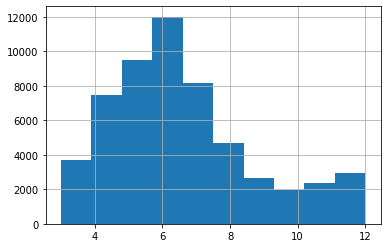

In [45]:
# ploting Histogram of the RFM Scores.

segmented_rfm.RFMScore.hist()

### v)  checking the conversion of the top User, according to the RFM and Quartile Method. 

In [31]:
# checking the conversion of the top User.

# filtering to get the conversion of the top user with USER_ID
top_customer = df_conversions[df_conversions['User_ID'] == '2c75940486d75040f269c9671ab746dffefe9692']

# checking first 10 conversions.
top_customer.head(10)

,Conv_Date,Revenue,User_ID,Conv_ID
7833,2017-04-04,1000.99972,2c75940486d75040f269c9671ab746dffefe9692,495c201553b4cf4d31d76fa67c385715bfd4c0ff
7894,2017-04-04,884.72000,2c75940486d75040f269c9671ab746dffefe9692,51c350d85bc9e815083420abbcc280096ea5c6b8
12299,2017-04-15,296.41140,2c75940486d75040f269c9671ab746dffefe9692,6316c3923ee83f5f7baa6b3d91efd333bcfabc83
14464,2017-05-02,238.85600,2c75940486d75040f269c9671ab746dffefe9692,5ffac439224b5387371f348a73a0cffb49df78ec
15192,2017-05-06,714.15200,2c75940486d75040f269c9671ab746dffefe9692,57abfd20e551cda4cfaa100f7b7ca81e8f05a68a
16117,2017-05-11,157.83200,2c75940486d75040f269c9671ab746dffefe9692,544cccf6904238b8ff27ca067a7e3b08535b734f
16119,2017-05-11,135.45600,2c75940486d75040f269c9671ab746dffefe9692,d639cc23c9900be005a5a731ef5dcc2b03f5d59c
17006,2017-05-21,358.01600,2c75940486d75040f269c9671ab746dffefe9692,cbebf1e0d8428a5f8f70ecdbdfb52a5c08132faa
18578,2017-05-30,220.37600,2c75940486d75040f269c9671ab746dffefe9692,ae41635d0a8dde476cdd233362ff49e29aca5b37
18594,2017-05-30,194.00800,2c75940486d75040f269c9671ab746dffefe9692,3b24346b617ec79fab91fbd5983e4e8e92ec487f


# 5) Cohort Analysis

In [32]:
# checking the head of conversions dataset.

df_conversions.head()

,Conv_Date,Revenue,User_ID,Conv_ID
0,2017-03-06,47.00000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c
1,2017-03-02,98.00004,NaN,faf5c1181ea84a32237dff45ca201d2c28f19d7b
2,2017-03-02,180.35300,NaN,b0e58a88459ece1b585ca22c93e633dc56273b83
3,2017-03-23,201.94104,433fdf385e33176cf9b0d67ecf383aa928fa261c,f0e6b7de22332c7b18c024e550bb1d860130cdf1
4,2017-03-03,197.47008,NaN,966568c7c859480c79b212520d20a51e735fd735


### i) Calculating Cohort

In [33]:
# declaring a method to get us the first date of each month from the dataset.
def get_month(x): return dt.datetime(x.year, x.month, 1)

# creating a column of Conv_Month which can hold the first date of each month
df_conversions['Conv_Month'] = df_conversions['Conv_Date'].apply(get_month)

# create a grouping dataframe by grouping the user_id according to the months.
grouping = df_conversions.groupby('User_ID')['Conv_Month']

# create a CohortMonth column in the conversions database with the minimum value.
df_conversions['CohortMonth'] = grouping.transform('min')

In [34]:
# checking the first 5 rows of the conversions dataset to have a look.

df_conversions.head()

,Conv_Date,Revenue,User_ID,Conv_ID,Conv_Month,CohortMonth
0,2017-03-06,47.00000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c,2017-03-01,2017-03-01
1,2017-03-02,98.00004,NaN,faf5c1181ea84a32237dff45ca201d2c28f19d7b,2017-03-01,NaT
2,2017-03-02,180.35300,NaN,b0e58a88459ece1b585ca22c93e633dc56273b83,2017-03-01,NaT
3,2017-03-23,201.94104,433fdf385e33176cf9b0d67ecf383aa928fa261c,f0e6b7de22332c7b18c024e550bb1d860130cdf1,2017-03-01,2017-03-01
4,2017-03-03,197.47008,NaN,966568c7c859480c79b212520d20a51e735fd735,2017-03-01,NaT


In [35]:
## function for extracting the year, month and day from the date value. 

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [36]:
# getting the year and month of Conv_Month Column from the get_date_int method.
invoice_year, invoice_month, _ = get_date_int(df_conversions, 'Conv_Month')

# getting the year and month of CohortMonth Column from the get_date_int method.
cohort_year, cohort_month, _ = get_date_int(df_conversions, 'CohortMonth')

In [37]:
# calculating the years difference among the invoice and cohort year.
years_diff = invoice_year - cohort_year

# calculating the month difference among the invoice and cohort month.
months_diff = invoice_month - cohort_month

In [38]:
# creating the cohortIndex.

df_conversions['CohortIndex'] = years_diff * 12 + months_diff + 1

In [39]:
# checking the top 5 rows of conversion dataframe.

df_conversions.head()

,Conv_Date,Revenue,User_ID,Conv_ID,Conv_Month,CohortMonth,CohortIndex
0,2017-03-06,47.00000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c,2017-03-01,2017-03-01,1.0
1,2017-03-02,98.00004,NaN,faf5c1181ea84a32237dff45ca201d2c28f19d7b,2017-03-01,NaT,NaN
2,2017-03-02,180.35300,NaN,b0e58a88459ece1b585ca22c93e633dc56273b83,2017-03-01,NaT,NaN
3,2017-03-23,201.94104,433fdf385e33176cf9b0d67ecf383aa928fa261c,f0e6b7de22332c7b18c024e550bb1d860130cdf1,2017-03-01,2017-03-01,1.0
4,2017-03-03,197.47008,NaN,966568c7c859480c79b212520d20a51e735fd735,2017-03-01,NaT,NaN


In [40]:
# checking the null values in our conversions dataset.

df_conversions.isna().sum()

Conv_Date         0
Revenue           0
User_ID        2296
Conv_ID           0
Conv_Month        0
CohortMonth    2296
CohortIndex    2296
dtype: int64

In [41]:
## grouping the dataset according to the CohortMonth and CohortIndex
grouping = df_conversions.groupby(['CohortMonth', 'CohortIndex'])

# creating a cohort data by getting unique User_ID
cohort_data = grouping['User_ID'].apply(pd.Series.nunique)

# reseting the index of the data.
cohort_data = cohort_data.reset_index()

# creating the cohort counts by making cohortmonth index and cohortIndex as column and User_ID as value of those columns
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='User_ID')

In [42]:
# checking the cohort_counts dataset.

cohort_counts

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2017-03-01,4448.0,1047.0,637.0,569.0,540.0,393.0,517.0,469.0,496.0,317.0,330.0,303.0,277.0
2017-04-01,7266.0,573.0,594.0,677.0,403.0,721.0,778.0,631.0,334.0,426.0,339.0,354.0,NaN
2017-05-01,3190.0,187.0,219.0,161.0,218.0,208.0,188.0,135.0,101.0,126.0,89.0,NaN,NaN
2017-06-01,3794.0,182.0,137.0,152.0,153.0,165.0,82.0,96.0,89.0,68.0,NaN,NaN,NaN
2017-07-01,4058.0,124.0,130.0,117.0,137.0,62.0,85.0,64.0,70.0,NaN,NaN,NaN,NaN
2017-08-01,3388.0,147.0,120.0,109.0,52.0,59.0,58.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-09-01,4519.0,132.0,147.0,79.0,93.0,73.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01,4450.0,138.0,61.0,59.0,53.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,5173.0,81.0,59.0,52.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ii) Interpretation 

### iii) Results

In [43]:
# Assigning first column as cohort size.
cohort_sizes = cohort_counts.iloc[:,0]

# calulcating the retention by dividing with the cohort size.
retention = cohort_counts.divide(cohort_sizes, axis=0) 
retention.round(2) * 100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2017-03-01,100.0,24.0,14.0,13.0,12.0,9.0,12.0,11.0,11.0,7.0,7.0,7.0,6.0
2017-04-01,100.0,8.0,8.0,9.0,6.0,10.0,11.0,9.0,5.0,6.0,5.0,5.0,NaN
2017-05-01,100.0,6.0,7.0,5.0,7.0,7.0,6.0,4.0,3.0,4.0,3.0,NaN,NaN
2017-06-01,100.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,NaN,NaN,NaN
2017-07-01,100.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-08-01,100.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,3.0,3.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01,100.0,3.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,100.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### iv) Plotting the Cohort Analysis Output.

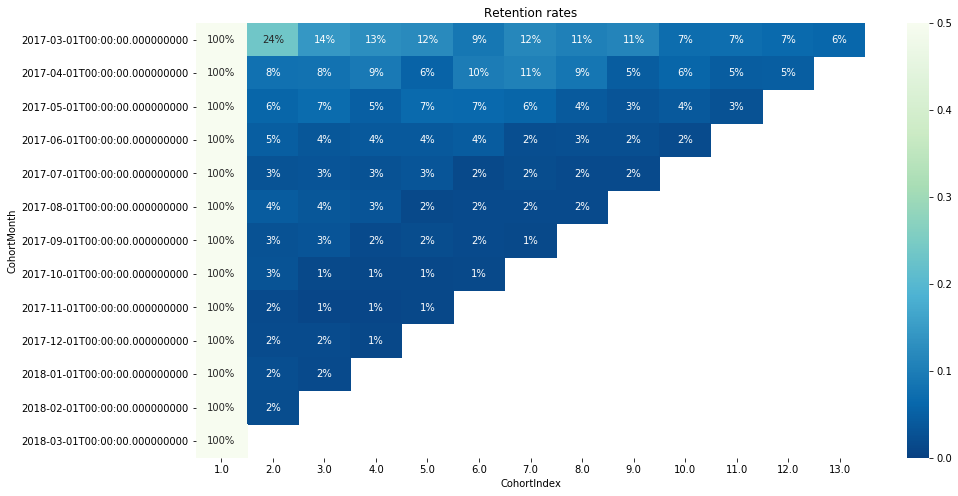

In [44]:
# Ploting the Cohort Analysis

# defining the fig size.
plt.figure(figsize=(15, 8))

# assigning the plot title.
plt.title('Retention rates')

# ploting the chart usign Seaborn.
sns.heatmap(
    data = retention,
    annot = True,
    fmt = '.0%',
    vmin = 0.0,
    vmax = 0.5,
    cmap = 'GnBu_r'
)

# Showing the plot
plt.show()